## 2.1 다중선형회귀모형


### 다중선형회귀모형의 기본형

$ Y = X_1 \beta_1 + X_2 \beta_2 + \dots + X_k \beta_k + e $

- $ Y $는 종속변수 벡터 ($ T \times 1 $)
- $ X_1, X_2, \dots, X_k $는 독립변수들 ($ T \times 1 $)
- $ \beta_1, \beta_2, \dots, \beta_k $는 회귀계수들 ($ k \times 1 $)
- $ e $는 오차항 벡터 ($ T \times 1 $)
- 회귀식은 오차항 $ e $가 정규분포를 따르는 것으로 가정
$
e | X_1, X_2, \dots, X_k \sim \text{Normal}(0, \sigma^2 I_T)
$

$
Y | X, \beta, \sigma^2 \sim \text{Normal}(X\beta, \sigma^2 I_T)
$


### 빈도주의 선형회귀
클래식한 가정 하에서 회귀계수를 추정하기 위해 사용하는 최소자승추정량은 다음과 같이 주어집니다

$
\hat{\beta}_{OLS} = (X'X)^{-1}X'Y
$



### 베이지안 선형회귀

베이지안 방법론을 사용하여 선형 회귀식을 추정할 때, 회귀 계수 $\beta$와 잔차 분산 $\sigma^2$에 대해 **사전 분포**를 설정하고, 이를 데이터에 의한 **사후 분포**로 갱신하는 과정이 이루어집니다. 

#### 사전분포 
사전 분포에 대한 연구자의 믿음은 경제이론이나 과거의 통계적 지식을 바탕으로 설정되며, 사후 분포는 주어진 데이터와 사전 정보가 결합되어 결정됩니다. 여기서, $\alpha_0$, $\delta_0$, $\beta_0$, $B_0$는 사전 분포의 하이퍼파라미터를 나타내며, 이 값들은 연구자의 사전 지식에 의해 설정됩니다. 이러한 하이퍼 파라미터는 연구자의 사전 믿음을 반영하지만, 지나치게 강력한 사전 정보는 사후 분포에 영향을 크게 미칠 수 있습니다. 따라서 하이퍼 파라미터를 설정할 때는 데이터를 고려해 적절한 사전 정보의 강도를 설정해야 합니다. 만약 하이퍼 파라미터를 통해 얻은 사전 정보가 충분히 강력하면, 데이터에 포함된 정보가 사후 추정에 미치는 영향이 줄어들게 됩니다. 반면, 사전 정보가 약할 경우 데이터가 추정에 더 큰 영향을 미치게 됩니다.


- 회귀계수 $ \beta $에 대해 정규분포사전분포:
$
\beta \sim \text{Normal}(\beta_0, \sigma^2 B_0)
$
    - **$\beta_0$**: $\beta$의 사전 분포에서 평균을 결정하는 하이퍼 파라미터입니다. 연구자가 선험적으로 $\beta$가 어떤 값에 가까울 것이라고 믿는지를 반영합니다.
    - **$\sigma^2 B_0$**: $\beta$의 사전 분포의 분산을 결정하는 하이퍼 파라미터입니다. $\sigma^2$와 연동되어 $\beta$의 불확실성을 조절합니다. 분산이 클수록 연구자의 사전 정보가 덜 확신적이라는 것을 의미합니다.
      
    - 여기서 $\beta$의 사전 분산으로 $B_0$ 대신 $\sigma^2 B_0$를 사용하는 이유는 두 가지입니다:
        - $\beta$의 사후 분포를 도출할 때 용이하기 때문입니다. $\beta$의 사전 분산이 $\sigma^2$와 연동되면, 계산이 더 간단해지고 모수 추정에 도움이 됩니다.
        - 오차항의 크기 $\sigma^2$가 클수록 연구자의 사전 정보(믿음)가 약해질 수 있습니다. 즉, 데이터에 포함된 정보량이 많을수록 사전 정보의 영향력이 줄어들어야 합니다.

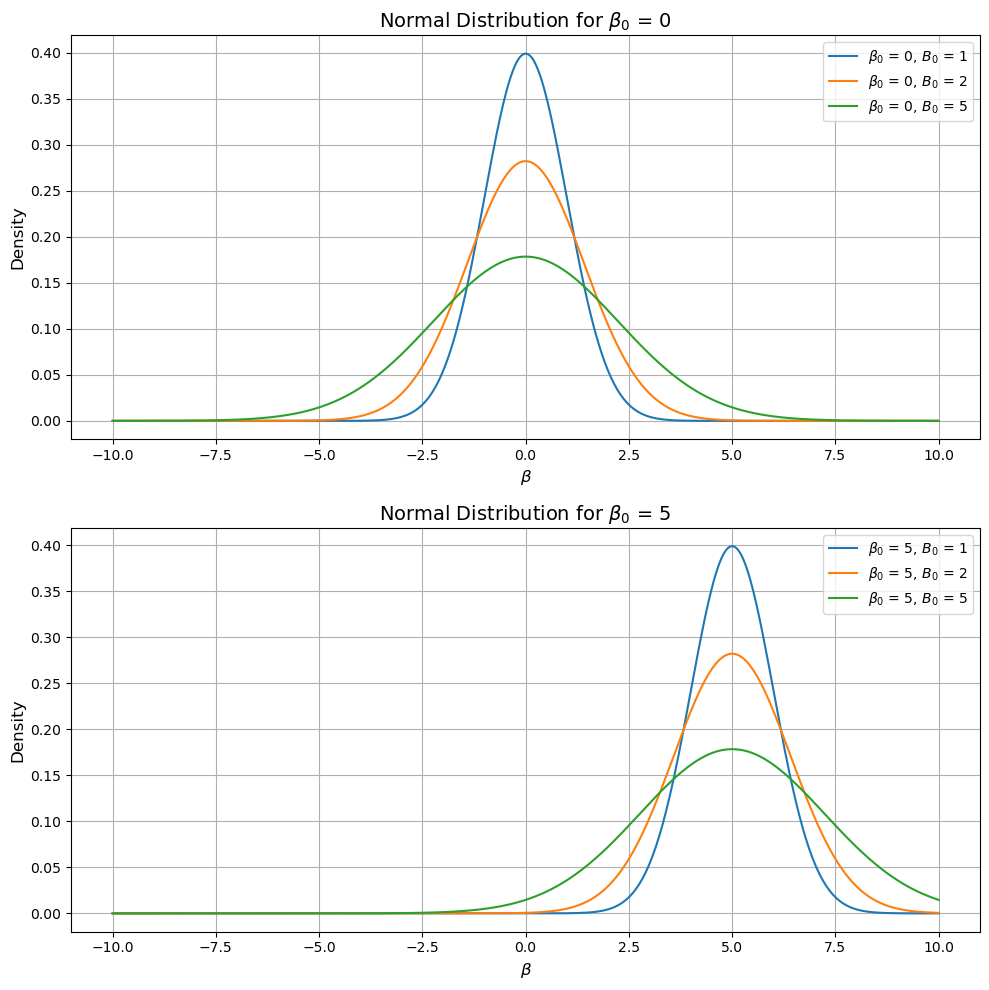

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# 베타분포의 하이퍼 파라미터에 따른 분포의 변화를 보기위한 코드

# Define the hyperparameters for the normal distribution (beta_0 and B_0)
beta0_values = [0, 5]  # Prior mean values
B0_sets = [[1, 2, 5], [1, 2, 5]]  # Prior variance (B_0 corresponds to variance in Normal distribution)

# Generate beta values (x-axis)
beta_values = np.linspace(-10, 10, 500)

# Create a 2x1 grid plot
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

# Loop over each beta_0 value and corresponding B_0 set
for idx, beta0 in enumerate(beta0_values):
    # Plot for each B_0 value corresponding to this beta_0
    for B0 in B0_sets[idx]:
        pdf = norm.pdf(beta_values, loc=beta0, scale=np.sqrt(B0))
        axes[idx].plot(beta_values, pdf, label=f"$\\beta_0$ = {beta0}, $B_0$ = {B0}")
    
    # Customize the subplots
    axes[idx].set_title(f"Normal Distribution for $\\beta_0$ = {beta0}", fontsize=14)
    axes[idx].set_xlabel("$\\beta$", fontsize=12)
    axes[idx].set_ylabel("Density", fontsize=12)
    axes[idx].legend()
    axes[idx].grid(True)

plt.tight_layout()
plt.show()

- 분산 $ \sigma^2 $에 대해 역감마분포(Inverse-Gamma) 사전분포:
$
\sigma^2 \sim \text{InverseGamma}\left( \frac{\alpha_0}{2}, \frac{\delta_0}{2} \right)
$
    - **$\alpha_0$**: 오차항 $\sigma^2$의 사전 분포에서 형태를 결정하는 하이퍼 파라미터입니다. 이는 분포의 'shape'를 결정하여, 사후 분포가 얼마나 예측 가능할지에 영향을 줍니다. 값이 클수록 분포가 날카로워집니다.
    - **$\delta_0$**: 오차항 $\sigma^2$의 사전 분포에서 스케일을 결정하는 하이퍼 파라미터입니다. 이는 분포의 스케일(크기)을 결정하여, 오차항에 대한 불확실성을 조절합니다. 값이 클수록 분포가 넓어지며, $\sigma^2$에 대해 연구자의 사전 정보가 덜 확신적일 때 큰 값을 가질 수 있습니다.


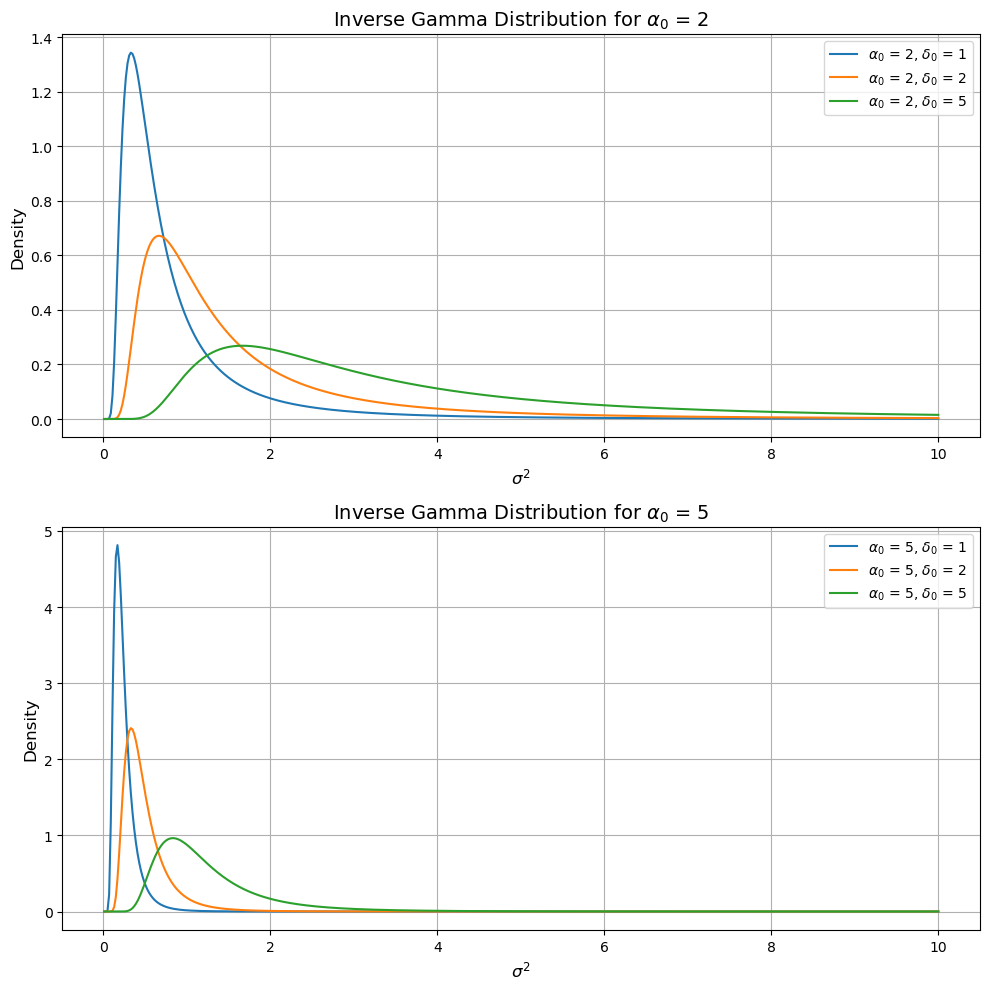

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import invgamma

# 역감마분포의 하이퍼 파라미터에 따른 분포의 변화를 보기위한 코드
# Define the hyperparameters for inverse gamma distribution (alpha_0 and delta_0)
alpha0_values = [2, 5]
delta0_sets = [[1, 2, 5], [1, 2, 5]]

# Generate sigma^2 values (x-axis)
sigma2_values = np.linspace(0.01, 10, 500)

# Create a 2x1 grid plot
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

# Loop over each alpha_0 value and corresponding delta_0 set
for idx, alpha0 in enumerate(alpha0_values):
    # Plot for each delta_0 value corresponding to this alpha_0
    for delta0 in delta0_sets[idx]:
        pdf = invgamma.pdf(sigma2_values, a=alpha0, scale=delta0)
        axes[idx].plot(sigma2_values, pdf, label=f"$\\alpha_0$ = {alpha0}, $\\delta_0$ = {delta0}")
    
    # Customize the subplots
    axes[idx].set_title(f"Inverse Gamma Distribution for $\\alpha_0$ = {alpha0}", fontsize=14)
    axes[idx].set_xlabel("$\\sigma^2$", fontsize=12)
    axes[idx].set_ylabel("Density", fontsize=12)
    axes[idx].legend()
    axes[idx].grid(True)

plt.tight_layout()
plt.show()

### 케이스별 분석을 통한 하이퍼파라미터에 대한 깊은 이해


#### 2.1.1 Case 1: $ \sigma^2 $가 알려진 경우

#####  1) 베타의 사후 분포 도출
먼저, $\sigma^2$가 알려져 있는 상황에서 $\beta$의 사후 분포를 베이지안 방식으로 도출합니다. 
- $\beta \sim \text{Normal}(\beta_0, \sigma^2 B_0)$
- $Y | \beta \sim \text{Normal}(X\beta, \sigma^2 I_T)$
베이지안 정리에 의해 $\beta$의 사후 분포는 사전 분포와 우도함수의 곱으로 비례합니다.
- $
\pi(\beta | Y) \propto f(Y | \beta) \pi(\beta)
$
위 식에서 우도함수 $f(Y | \beta)$와 사전 분포 $\pi(\beta)$는 각각 정규 분포이므로, 두 분포를 곱하여 새로운 정규 분포 형태의 사후 분포를 얻습니다.
사후 분포 $\pi(\beta | Y)$는 다음과 같은 형태를 가지게 됩니다.
- $
\pi(\beta | Y) \propto \exp\left(-\frac{1}{2\sigma^2} \left[ (Y - X\beta)'(Y - X\beta) + (\beta - \beta_0)'B_0^{-1}(\beta - \beta_0) \right] \right)
$
위 식을 정리하면, $\beta$의 사후 분포는 다음과 같은 다변량 정규분포로 나타낼 수 있습니다.
- $
\beta | Y \sim \text{Normal}(B_1 A, \sigma^2 B_1)
$
    - $B_1 = (X'X + B_0^{-1})^{-1}$
    - $A = X'Y + B_0^{-1} \beta_0$
- 즉, $\beta$의 사후 분포는 데이터로부터 계산된 사후 평균 $B_1 A$와 사후 분산 $\sigma^2 B_1$을 따르게 됩니다.


##### 2) 베타의 사후 분포의 특징
$\beta$의 사후 평균 $B_1 A$는 사전 정보 $\beta_0$와 OLS 추정값 $\hat{\beta}_{OLS}$의 가중 평균입니다. 이를 식 (2.14)로 나타내면 다음과 같습니다.
- $
E(\beta | Y) = B_1 A = \frac{X'Y + B_0^{-1} \beta_0}{X'X + B_0^{-1}}
$
$B_1$은 사후 분포의 분산을 나타내며, 데이터로부터 얻은 정보($X'X$)와 사전 정보($B_0^{-1}$)를 결합한 가중치를 나타냅니다. 이때 데이터에 대한 정보가 많아질수록 ($X'X$가 커질수록) $\beta$의 사후 평균은 데이터에 더 크게 의존하고, 사전 분포의 영향은 줄어듭니다.

- $
B_1 A = \frac{1}{1 + \frac{\text{Var}(\hat{\beta}_{OLS})}{\text{Var}(\beta)}} \hat{\beta}_{OLS} + \left(1 - \frac{1}{1 + \frac{\text{Var}(\hat{\beta}_{OLS})}{\text{Var}(\beta)}} \right) \beta_0
$

이 식에서 **가중치**는 데이터 기반 추정치 $\hat{\beta}_{OLS}$와 사전 정보 $\beta_0$ 사이의 균형을 나타냅니다. 
  - **데이터의 신뢰성**이 높을 때 (즉, $\text{Var}(\hat{\beta}_{OLS})$가 작을 때) 사후 평균은 데이터 기반 OLS 추정값에 더 가까워지고, 
  - 반대로 **데이터의 신뢰성**이 낮을 때 (즉, $\text{Var}(\hat{\beta}_{OLS})$가 클 때) 사후 평균은 사전 평균 $\beta_0$에 더 가깝게 수렴합니다.

- OLS 추정치의 분산이 커질수록, 즉 데이터에 대한 정보가 적을수록 사후 평균은 사전 정보에 더 크게 의존하게 되며, 사후 분포는 사전 분포와 유사한 형태를 갖게 됩니다. 
- 반대로, 데이터가 많고 OLS 추정치의 분산이 작아질수록 사후 평균은 $\hat{\beta}_{OLS}$에 가까워집니다. 이는 사후 분포가 데이터 기반 정보를 더 많이 반영한다는 의미입니다.

##### 3) 사전 믿음의 강도에 따른 사후 분포의 변화
- **강한 사전 믿음**: 사전 분포가 좁고, 데이터의 정보가 상대적으로 적게 반영되며, 사후 분포는 사전 분포에 가까운 형태를 유지합니다.
- **약한 사전 믿음**: 사전 분포가 넓고, 데이터의 정보가 사후 분포에 더 많이 반영됩니다. 사후 분포는 데이터의 정보에 더 크게 의존하는 형태를 띄게 됩니다.


##### 4) $B_0$의 선택
이 값을 크게 설정한다는 것은, 사전 분포의 분산을 크게 설정하는 것을 의미합니다. 이는 연구자가 사전 정보에 대해 덜 확신하고 있다는 것을 반영하는데, 이에 따라 다음과 같은 효과가 발생합니다
- **사전 분포가 더 넓어짐**:
   - $ B_0 $ 값이 커지면, $\beta$의 사전 분포는 더 넓어지며, 이는 사전 정보가 덜 구체적이거나 확실하지 않음을 의미합니다. 즉, 연구자는 $\beta$가 어떤 값에 가까울지에 대해 명확한 사전 믿음이 없다고 가정하게 됩니다.
- **데이터 정보의 영향이 더 커짐**:
   - $ B_0 $ 값이 커질수록, 사전 정보의 영향이 줄어들고, 데이터로부터의 정보(즉, OLS 추정값 $\hat{\beta}_{OLS}$)에 더 의존하게 됩니다. 사후 평균은 데이터에 더 가깝게 수렴하며, 사후 분포는 데이터 기반 정보에 더 크게 영향을 받습니다.
- **사후 분포가 더 넓어질 가능성**:
   - $ B_0 $가 클수록 사후 분포는 더 넓어지고, 불확실성이 커질 수 있습니다. 이는 사전 정보가 덜 확실하고 데이터에 의존하게 되는 결과로 나타납니다. 따라서 사후 분포는 더 많은 가능성을 포함하며, 데이터의 영향을 강하게 반영하게 됩니다.

이와 반대로, **$ B_0 $ 값을 작게 설정**하면, 사후 분포는 연구자의 사전 믿음에 더 가깝게 수렴하게 되고, 데이터 정보는 상대적으로 덜 반영됩니다.



#### 2.1.2 Case 2: $ \sigma^2 $가 알려지지 않은 경우


##### 1) 시그마의 사후분포 도출

##### 2) 시그마의 사후분포의 특징

##### 3) 하이퍼 파라미터의 선택

1. **$\alpha_0$ (Shape Parameter)**:
   - $\alpha_0$가 클수록 : 분포의 형태가 더 좁아지고 날카로워지며, 이는 $\sigma^2$에 대한 더 확신된 정보를 반영합니다. 즉, $\alpha_0$가 클수록 사후 분포가 데이터에 의해 더 영향을 받아 분포가 뾰족해집니다.
   - $\alpha_0$가 작을수록 : 분포는 더 넓고, 불확실성이 높아집니다. 연구자의 사전 정보가 덜 확실한 상황일 때 작은 $\alpha_0$ 값을 선택할 수 있습니다.
   - 사후 분포에서 $\alpha_1 = a_0 + T$와 같이 데이터의 표본 크기와 더불어 사후 분포에 반영됩니다.

2. **$\delta_0$ (Scale Parameter)**:
   - $\delta_0$가 클수록 : 분포의 스케일이 커지고, 이는 $\sigma^2$에 대한 더 넓은 불확실성을 의미합니다. $\sigma^2$가 다양한 값일 가능성이 높다는 것을 의미하며, 사전 정보가 덜 확신적일 때 $\delta_0$를 크게 설정할 수 있습니다.
   - $\delta_0$가 작을수록 : 분포의 스케일이 작아져 $\sigma^2$에 대한 더 좁은 불확실성을 의미합니다. 이는 $\sigma^2$의 값에 대한 연구자의 확신이 높다는 것을 나타냅니다.
   - 사후분포에서 $\delta_1 = \delta_0 + (Y - X\beta)'(Y - X\beta)$로, $\delta_0$는 데이터와 관련된 잔차항과 더불어 $\sigma^2$의 사후 분포에 반영됩니다.





#### 2.1.3 Case 3: $ \beta $와 $ \sigma^2 $ 모두 알려지지 않은 경우

